In [1]:
# auto reload for python packages
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
from SubGraphMatcherEnhanced import SubGraphMatcher 
from SubGraphMatcherNaive import SubGraphMatcherNaive # The brute force solution

ImportError: cannot import name 'SubGraphMatcherNaive' from 'SubGraphMatcherNaive' (/Users/alex/openGraphMatching/ogm/SubGraphMatcherNaive.py)

In [34]:
print(nx)

<module 'networkx' from '/Users/alex/opt/anaconda3/envs/net/lib/python3.8/site-packages/networkx/__init__.py'>


In [114]:
def draw_graph(G):
    labels = nx.get_node_attributes(G, 'feat') 
    options = {
        'node_color': 'yellow',
        'node_size': 400,
        'width': 3,
        'labels': labels,
        'with_labels': True
    }
    nx.draw(G, **options)
    plt.show()

G_t = nx.path_graph(10)
G_q = nx.path_graph(2)
# draw_graph(G_t)
# draw_graph(G_q)

In [115]:
# Create a list of queris
queries = []
for i in range(10):
    queries.append(nx.path_graph(i))

In [349]:
SGM = SubGraphMatcherNaive(G_t)
print(SGM.check_match_subgraph(G_q))
# SGM.LDF(G_q, G_t)

NameError: name 'SubGraphMatcherNaive' is not defined

In [350]:
# Test the node feature part
G1 = nx.Graph()
G1.add_nodes_from([
    (0, {'feat': 'A'}),
    (1, {'feat': 'B'}),
    (2, {'feat': 'C'}),
    (3, {'feat': 'D'}),
])
G1.add_edges_from([
    (0, 1),
    (0, 2),
    (1, 2),
    (1, 3),
    (2, 3)])
# draw_graph(G1)

In [351]:
G2 = nx.Graph()
G2.add_nodes_from([
    (0, {'feat': 'A'}),
    (1, {'feat': 'C'}),
    (2, {'feat': 'B'}),
    (3, {'feat': 'C'}),
    (4, {'feat': 'B'}),
    (5, {'feat': 'C'}),
    (6, {'feat': 'B'}),
    (7, {'feat': 'C'}),
    (8, {'feat': 'D'}),
    (9, {'feat': 'D'}),
    (10, {'feat': 'D'}),
    (11, {'feat': 'D'}),
    (12, {'feat': 'D'}),
    (13, {'feat': 'C'}),
    (14, {'feat': 'D'}),
])
G2.add_edges_from([
    (0, 1),
    (0, 2),
    (0, 3),
    (0, 4),
    (0, 5),
    (0, 6),
    (0, 7),
    (1, 2),
    (1, 8),
    (2, 9),
    (2, 10),
    (3, 4),
    (3, 10),
    (4, 5),
    (4, 10),
    (4, 11),
    (4, 12),
    (5, 12),
    (6, 12),
    (6, 13),
    (7, 14),
    (9, 10),
])
# draw_graph(G2)

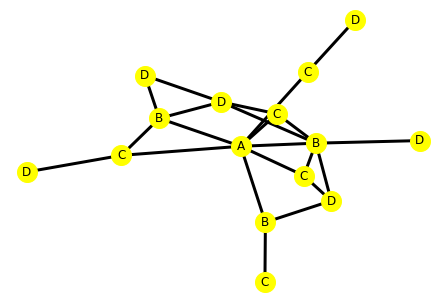

In [376]:
draw_graph(G2)

In [368]:
# Validate the subgraph matching with node features
SGM = SubGraphMatcher(G2)
SGM.check_match_subgraph(G1)

lc is [(0, 0)]
bn for 1 [0]
v is (1, 2)
v is (1, 4)
v is (1, 6)
lc for u 1 [(1, 2), (1, 4), (1, 6)]
lc is [(1, 2), (1, 4), (1, 6)]
bn for 2 [0, 1]
v is (2, 1)
v is (2, 3)
edge is None
wrong
v is (2, 5)
edge is None
wrong
lc for u 2 [(2, 1)]
lc is [(2, 1)]
bn for 3 [1, 2]
v is (3, 10)
edge is None
wrong
v is (3, 12)
edge is None
wrong
lc for u 3 []
lc is []
bn for 2 [0, 1]
v is (2, 1)
edge is None
wrong
v is (2, 3)
v is (2, 5)
lc for u 2 [(2, 3), (2, 5)]
lc is [(2, 3), (2, 5)]
bn for 3 [1, 2]
v is (3, 10)
v is (3, 12)
edge is None
wrong
lc for u 3 [(3, 10)]
lc is [(3, 10)]
Yes
bn for 3 [1, 2]
v is (3, 10)
edge is None
wrong
v is (3, 12)
lc for u 3 [(3, 12)]
lc is [(3, 12)]
Yes
bn for 2 [0, 1]
v is (2, 1)
edge is None
wrong
v is (2, 3)
edge is None
wrong
v is (2, 5)
edge is None
wrong
lc for u 2 []
lc is []


[{0: 0, 1: 4, 2: 3, 3: 10}, {0: 0, 1: 4, 2: 5, 3: 12}]

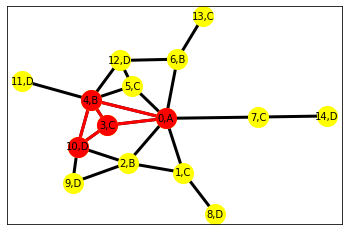

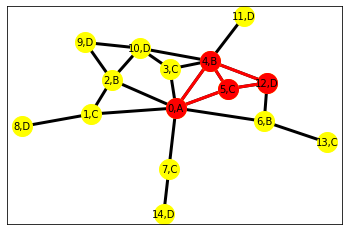

In [384]:
SGM.draw_multi_results()

In [354]:
SGM.backward_neighbors(3, [0,1,2,3], G1)

enter backward_neighbors computation
u is 3
order is [0, 1, 2, 3]
ns is []


[]